In [1]:
from textblob import TextBlob
import pandas as pd

In [2]:
data = pd.read_excel('twitter-2016test-A-clean.xlsx')
data = pd.DataFrame.to_numpy(data)

In [3]:

# neutrality_threshp = .26
# neutrality_thresho = .42
# .574851

neutrality_thresh = .26

y_true = [tweet[1] for tweet in data]
pos, neu, neg = 0, 0 ,0
for y in y_true:
    if y == 'positive':
        pos += 1
    elif y == 'neutral':
        neu += 1
    else:
        neg += 1

print("There are {} positive, {} neutral and {} negative polarity tweets".format(pos, neu, neg))

There are 5502 positive, 7839 neutral and 2310 negative polarity tweets


In [4]:
y_pred = []
for tweet in data:
    testimonial = TextBlob(tweet[2])

    if testimonial.sentiment.polarity > neutrality_thresh:
       tmp = 'positive'
    elif testimonial.sentiment.polarity < neutrality_thresh*(-1):
        tmp = 'negative'
    else:
        tmp = 'neutral'

    y_pred.append(tmp)

pos, neu, neg = 0, 0 ,0
for y in y_pred:
    if y == 'positive':
        pos += 1
    elif y == 'neutral':
        neu += 1
    else:
        neg += 1

print("There were predicted {} positive, {} neutral and {} negative polarity tweets".format(pos, neu, neg))

There were predicted 3866 positive, 10740 neutral and 1045 negative polarity tweets


In [5]:
import sklearn.metrics as sk

accuracy = sk.accuracy_score(y_true, y_pred, normalize=True)
f1 = sk.f1_score(y_true, y_pred, average='weighted')
recall = sk.recall_score(y_true, y_pred, average='weighted')
precision = sk.precision_score(y_true, y_pred, average='weighted')
matrix = sk.confusion_matrix(y_true, y_pred)

Metrics in average
Accuracy: 0.572
F1 score: 0.547
Precision: 0.562
Recall: 0.572


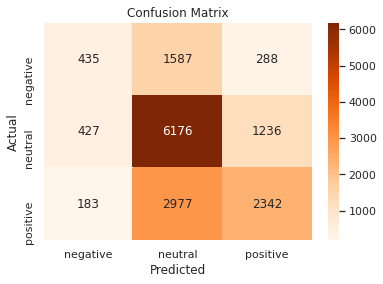

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

labels = ['negative', 'neutral', 'positive']
sns.heatmap(matrix,
            annot=True,
            fmt='d',
            xticklabels=labels,
            yticklabels=labels,
            cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
print('Metrics in average\nAccuracy: {:.3f}\nF1 score: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}'.format(
    accuracy,
    f1,
    precision,
    recall
))

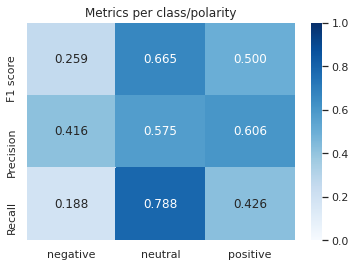

In [7]:
f1_per_class = sk.f1_score(y_true, y_pred, average=None)
recall_per_class = sk.recall_score(y_true, y_pred, average=None)
precision_per_class = sk.precision_score(y_true, y_pred, average=None)

metrics = [f1_per_class, precision_per_class, recall_per_class]

plt.title('Metrics per class/polarity')
sns.heatmap(metrics,
            annot=True,
            fmt='.3f',
            xticklabels=labels,
            yticklabels=['F1 score','Precision','Recall'],
            cmap='Blues',
            vmax=1.0,
            vmin=0.0)




## Notes

Threshold was selected after testing value from 0.1 to 0.9 with a step of 0.02.<br>
Weighted average was used for the metrics because the classes were imbalanced.<br>
Symmetrical threshold was selected but, setting upper and lower thresholds to values 0.26 and -0.42 results in
better accuracy (0.574851)
